# lab 9 clustering

### by Yash Upadhyay - 135618213

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('data(1).csv')
data

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


In [8]:
# Check for Missing data
data.isnull().values.any()
print(f'Is there any null value in dataset?? {data.isnull().values.any()}')
data[data.isnull().any(axis = 1)]

Is there any null value in dataset?? False


,Weight,Cholesterol,Gender


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [10]:
data.describe()

,Weight,Cholesterol,Gender
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


## elbow method:

In [32]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
K=range(1,12)  ##iterating 12 times
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [35]:
centers = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
centers

,Clusters,WSS
0,1,1.356095e+06
1,2,3.306598e+05
2,3,1.398644e+05
3,4,8.147534e+04
4,5,5.395405e+04
5,6,3.755460e+04
6,7,2.774147e+04
7,8,2.213676e+04
8,9,1.732693e+04
9,10,1.469321e+04


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

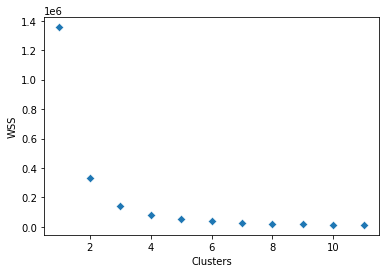

In [47]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = centers, marker='D', cmap=plt.cm.get_cmap("gist_heat_r", 10))

#### we can see a smooth curve between 4-6, so we can use 5 clusters.

## Silhouette Method 

In [60]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(data).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.6046935762406946
Silhouette score for k(clusters) = 4 is 0.5713619278436399
Silhouette score for k(clusters) = 5 is 0.5571388167270227
Silhouette score for k(clusters) = 6 is 0.5378393073154508
Silhouette score for k(clusters) = 7 is 0.5300157902576695
Silhouette score for k(clusters) = 8 is 0.5302716193902355
Silhouette score for k(clusters) = 9 is 0.5166084303212349
Silhouette score for k(clusters) = 10 is 0.5068244720244385
Silhouette score for k(clusters) = 11 is 0.5030953859120733
Silhouette score for k(clusters) = 12 is 0.4968248849920949


### as you can see using the Silhouette method, it can be seen that the optimum numbe rof clustering that can be used is 5